In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset import TileDataset
from models import TileMLP

2023-11-04 20:42:57.899350: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-04 20:42:57.902250: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-04 20:42:57.931157: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 20:42:57.931184: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 20:42:57.931202: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
batch_size = 600
batch_per_file_size = 20
dataset = TileDataset(
    batch_size=batch_size,
    batch_per_file_size=batch_per_file_size,
    build_tfrecords=False)

In [3]:
mlp = TileMLP(
    batch_size, 
    learning_rate=2e-4, 
    batch_per_file_size=batch_per_file_size)

In [4]:
mlp.train(dataset, None)

iteration 500 training loss 7.2722883 lr 0.00002
iteration 1000 training loss 4.5067797 lr 0.00004
iteration 1500 training loss 3.7535913 lr 0.00006
iteration 2000 training loss 4.053916 lr 0.00008
iteration 2500 training loss 3.2326725 lr 0.00010
iteration 3000 training loss 2.6167805 lr 0.00012
iteration 3500 training loss 3.5943482 lr 0.00014
iteration 4000 training loss 3.143374 lr 0.00016
iteration 4500 training loss 2.4593303 lr 0.00018
iteration 5000 training loss 3.1025956 lr 0.00020
iteration 5500 training loss 3.6016016 lr 0.00020
iteration 6000 training loss 3.184648 lr 0.00020
iteration 6500 training loss 2.9716573 lr 0.00020
iteration 7000 training loss 3.1035974 lr 0.00020
iteration 7500 training loss 2.6928217 lr 0.00020
iteration 8000 training loss 2.8762727 lr 0.00020
iteration 8500 training loss 2.9726274 lr 0.00020
iteration 9000 training loss 2.746075 lr 0.00020
iteration 9500 training loss 2.4828002 lr 0.00020
iteration 10000 training loss 2.7194312 lr 0.00020
epoc

## Evaluate validation set

In [5]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

In [6]:
val_df[['prediction', 'target']].describe()

,prediction,target
count,1.042735e+06,1.042735e+06
mean,-2.333123e+00,1.267942e+00
std,4.008628e+00,7.997063e-01
min,-1.411115e+01,-4.157284e-01
25%,-5.367052e+00,6.690614e-01
50%,-3.055634e+00,1.165585e+00
75%,1.509099e-01,1.747577e+00
max,2.156572e+01,7.079467e+00


In [7]:
val_df

,ID,config_index,prediction,target
0,b'tile:xla:inception_v3_batch_128_train_718350...,2,2.583323,0.447887
1,b'tile:xla:tf2_bert_pretrain_dynamic_batch_siz...,68,-5.794111,0.317965
2,b'tile:xla:inception_v3_batch_128_train_-4c184...,1065,2.276587,0.014384
3,b'tile:xla:resnet50.4x4.fp16_11cc85949afb30da',125,-6.018929,0.871633
4,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,608,-3.025122,1.815645
...,...,...,...,...
1042730,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,1161,-6.132047,1.313620
1042731,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,3767,-5.053796,1.778883
1042732,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,2682,-5.335868,1.569504
1042733,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,2608,-6.889509,1.230934


In [8]:
val_df.groupby('ID').count().describe()

,config_index,prediction,target
count,676.000000,676.000000,676.000000
mean,1542.507396,1542.507396,1542.507396
std,2271.963138,2271.963138,2271.963138
min,4.000000,4.000000,4.000000
25%,130.000000,130.000000,130.000000
50%,603.500000,603.500000,603.500000
75%,1893.000000,1893.000000,1893.000000
max,9997.000000,9997.000000,9997.000000


Text(0, 0.5, 'prediction')

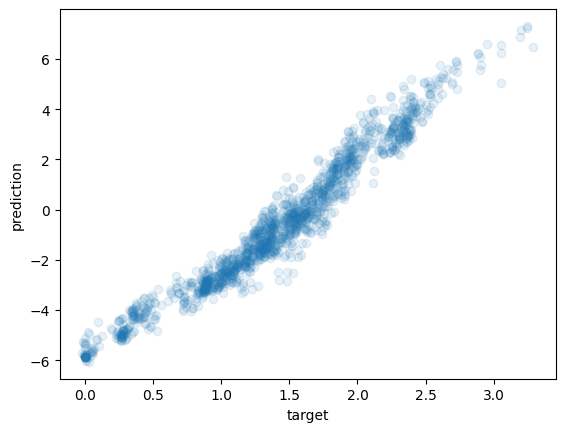

In [9]:
x_lin = np.linspace(0, 3, 100)
#plt.plot(x_lin, x_lin, color='orange')

#random_sample = val_df.sample(1000)
random_id = np.random.choice(val_df['ID'].unique())
random_sample = val_df[val_df['ID'] == random_id]

plt.scatter(
    random_sample.target,
    random_sample.prediction,
    alpha=0.1
)
plt.xlabel('target')
plt.ylabel('prediction')

Text(0, 0.5, 'squared error')

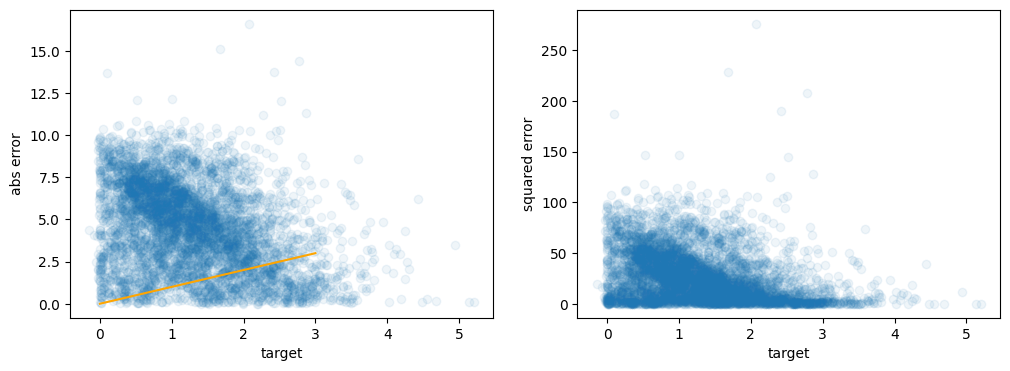

In [10]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 3, 100)
plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [11]:
def compute_best_5(df):
    top = df.sort_values('prediction').iloc[:5]
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

In [12]:
val_prediction = val_df.groupby('ID').apply(compute_best_5)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

ID
tile:xla:bert_pretraining.4x4.fp16_-18321ad156c55c0b          423;82;252;846;338
tile:xla:bert_pretraining.4x4.fp16_-1972c148bcabec74           381;139;285;0;332
tile:xla:bert_pretraining.4x4.fp16_-1a91e1daf560d9c7              66;32;15;82;13
tile:xla:bert_pretraining.4x4.fp16_-1c6db741e059e66c               23;15;11;35;0
tile:xla:bert_pretraining.4x4.fp16_-2687e894772f7802        323;978;1143;980;817
                                                                  ...           
tile:xla:unet_3d.4x4.bf16_-563d7c5458dedfa9                    641;537;755;157;0
tile:xla:unet_3d.4x4.bf16_-66d55ea6ab9f0635                   78;275;354;297;176
tile:xla:unet_3d.4x4.bf16_128e1e63e17596dc              5841;4277;6601;3539;1105
tile:xla:unet_3d.4x4.bf16_2c26a09dea860431              3822;3888;2985;2984;1976
tile:xla:unet_3d.4x4.bf16_ffc12c104f9925                       992;379;616;860;0
Length: 676, dtype: object

In [13]:
def tile_score(candidate_configs, tile_dict):
    config_scores = tile_dict['config_runtime'] / tile_dict['config_runtime_normalizers']
    best_runtime = np.min(config_scores)
    best_candidate_runtime = np.min(config_scores[candidate_configs])
    score = 2 - best_candidate_runtime / best_runtime
    return score

In [14]:
tile_valid_dir = 'predict-ai-model-runtime/npz_all/npz/tile/xla/valid'

scores = []
tile_ids = []
for filename in os.listdir(tile_valid_dir):
    tile_id = 'tile:xla:' + filename.rstrip('.npz')
    tile_dict = dict(np.load(os.path.join(tile_valid_dir, filename)))
    n_configurations = len(tile_dict['config_runtime'])
    candidate_configs = val_prediction[tile_id]
    candidate_configs = [int(i) for i in candidate_configs.split(';')]
    score = tile_score(candidate_configs, tile_dict)
    scores.append(score)
    tile_ids.append(tile_id)

evaluation_result = pd.DataFrame(
    data=np.stack([tile_ids, scores], axis=-1),
    columns=['ID', 'score']
)
evaluation_result.sort_values('score')

,ID,score
542,tile:xla:unet_3d.4x4.bf16_-21e75615e98a9f7b,-0.22927879962037512
300,tile:xla:mlperf_bert_batch_24_2x2_b56ff59b3b2906e,0.0051935820982469405
125,tile:xla:resnet50.4x4.fp16_488467c56f0fee35,0.09030665004905791
522,tile:xla:unet_3d.4x4.bf16_128e1e63e17596dc,0.3651924097981536
379,tile:xla:mlperf_bert_batch_24_2x2_-132dd84b121...,0.46377414168336717
...,...,...
176,tile:xla:inception_v3_batch_128_train_3b6f107f...,1.0
432,tile:xla:inception_v3_batch_128_train_56ffd5d0...,1.0
179,tile:xla:inception_v3_batch_128_train_-733c0a9...,1.0
441,tile:xla:tf2_bert_pretrain_dynamic_batch_size_...,1.0


In [15]:
evaluation_result.sort_values('score').iloc[:30]

,ID,score
542,tile:xla:unet_3d.4x4.bf16_-21e75615e98a9f7b,-0.22927879962037512
300,tile:xla:mlperf_bert_batch_24_2x2_b56ff59b3b2906e,0.0051935820982469405
125,tile:xla:resnet50.4x4.fp16_488467c56f0fee35,0.09030665004905791
522,tile:xla:unet_3d.4x4.bf16_128e1e63e17596dc,0.3651924097981536
379,tile:xla:mlperf_bert_batch_24_2x2_-132dd84b121...,0.46377414168336717
266,tile:xla:tf2_bert_pretrain_dynamic_batch_size_...,0.5396208481759486
640,tile:xla:mlperf_bert_batch_24_2x2_-4725e1f98e8...,0.6000263698280035
511,tile:xla:inception_v3_batch_128_train_-4a28ab8...,0.6250844563629032
435,tile:xla:mlperf_bert_batch_24_2x2_-1975dbd98f2...,0.6386713101320738
317,tile:xla:resnet_v1_50_official_batch_128_bf16_...,0.7100408901382751


In [16]:
evaluation_result['nn'] = evaluation_result['ID'].apply(lambda x: x.split(':')[2].replace('.', '_').split('_')[0])
evaluation_result['score'] = evaluation_result['score'].astype(float)

In [17]:
evaluation_result[['score', 'nn']].groupby('nn').mean()

,score
nn,
bert,0.971648
inception,0.985960
mlperf,0.941246
resnet,0.967429
resnet50,0.967475
tf2,0.952487
unet,0.787311


In [18]:
evaluation_result['score'].mean()

0.9681271332363273

## Inference over test set

In [19]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

,ID,config_index,prediction
0,b'tile:xla:746d001b150bede99731e62a85b7157e',628,-4.088413
1,b'tile:xla:bc9114e341a14fd8ac6518d0075a7258',312,4.530230
2,b'tile:xla:181083d8d0f89d13dd24cd26daaf7d0f',13,3.778207
3,b'tile:xla:d58ebbf05cbe69c64da650ad3f59ca33',141,5.336084
4,b'tile:xla:b8dddaff79ecc1c67165ca66153d885d',7,-5.545608
...,...,...,...
1420531,b'tile:xla:b21898236867eece409f10ad0f3f18b4',8668,-3.809872
1420532,b'tile:xla:b21898236867eece409f10ad0f3f18b4',1227,-5.575696
1420533,b'tile:xla:b21898236867eece409f10ad0f3f18b4',3296,-5.786727
1420534,b'tile:xla:b21898236867eece409f10ad0f3f18b4',5979,-5.476331


In [20]:
test_prediction = test_df.groupby('ID').apply(compute_best_5)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

ID
tile:xla:0023795810403f8b0b244d88c901322f    4918;3308;1194;5065;4135
tile:xla:005c91ca7a50fffc663678fd44316f04          208;498;623;502;21
tile:xla:0070642211d5a98a16b94f4d7df229fe         254;577;813;189;970
tile:xla:008191e0c67a6e7a62cde1a3e1d66795        978;583;292;176;1099
tile:xla:008730b43f100be7c2800d7cb89578a4         336;729;473;206;766
                                                       ...           
tile:xla:fe52756188d770ee661f69dcd2688142     6761;7684;8537;7912;259
tile:xla:fe91ecfc5176e4dea4cec619beb19aeb            3;182;168;175;15
tile:xla:ff9a30ba54b97a48b9f5370a9b1e8cb6             106;21;33;36;72
tile:xla:ffa452493cbec7e4d2fee040879f98ae       1340;853;181;778;1156
tile:xla:ffbfd532de0a28c79f4740753fd78006           71;122;141;118;40
Length: 844, dtype: object

In [21]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('predictions/tile_test_prediction_11_04_21_06.csv')

In [ ]:
plt.hist(mlp.dense_layer_1.kernel.numpy().flatten(), bins=50);